We are to predict the the weekly number of visits at key brands in Indiana (var_name: sum_visit_count).
First begin by visualizing the data to notice trends and relationships.

In [260]:
import os
import pandas
import numpy as np
from google.cloud import bigquery
from google.oauth2 import service_account
from google.cloud.bigquery import magics

In [332]:
# Check if data can be properly loaded

os.environ['GOOGLE_APPLICATION_CREDENTIALS'] ='bigquery_key.json'
bigquery_client = bigquery.Client(project='ironhacks-covid19-data')
bigquery_client = bigquery.Client()

QUERY = """

SELECT *
FROM ironhacks-covid19-data.ironhacks_covid19_competition.predictionset_covid19_phase1

"""

query_job = bigquery_client.query(QUERY)
data = query_job.to_dataframe()
data.head(15)

,uuid,brand_name,naics,top_category,week_number,date_start,nr_POIs,cards_per_week,transactions_per_week,total_spent_per_week,avg_distance_from_home,sd_distance_from_home,avg_median_dwell,sd_median_dwell,sum_visit_counts
0,15329284-0578-4bd0-802b-2321ac716020,7-Eleven,445120,Grocery Stores,10,2020-03-09,28,8649,10924,324452.92,5139,4801,10,10,1492
1,361ae199-51e7-4dbf-a699-248f51bd7b73,A&W Restaurants,722511,Restaurants and Other Eating Places,10,2020-03-09,8,31,32,333.64,9018,2597,20,5,235
2,bd4d1f13-5d85-4302-9965-a10bf959d429,ALDI,445110,Grocery Stores,10,2020-03-09,82,4992,5195,226672.35,7815,3814,19,3,14474
3,2beefcf9-68a4-45f4-bbc2-9018260cc464,Ace Hardware,444130,Building Material and Supplies Dealers,10,2020-03-09,67,590,625,12805.75,6575,4299,16,11,3214
4,b0a148ea-b7eb-4f2c-ae5d-eb6e4e1551fe,Advance Auto Parts,441310,"Automotive Parts, Accessories, and Tire Stores",10,2020-03-09,108,1109,1213,52326.62,7553,4536,20,20,4223
5,b8518988-f48a-434a-bb27-8f2635204ace,Allstate Insurance,524210,"Agencies, Brokerages, and Other Insurance Rela...",10,2020-03-09,23,134,162,22427.63,8844,5610,105,223,475
6,d14551e2-d585-4881-9487-0f1682202627,America's Best Contacts & Eyeglasses,621320,Offices of Other Health Practitioners,10,2020-03-09,3,93,105,12908.05,16748,14506,20,12,41
7,757664af-ba19-481c-8fdb-ad54d94c0fba,American Eagle Outfitters,448140,Clothing Stores,10,2020-03-09,2,46,46,3411.61,8101,4971,19,8,113
8,d454dc3e-3458-4801-b7ce-80529f894a2b,Anytime Fitness,713940,Other Amusement and Recreation Industries,10,2020-03-09,100,15,18,877.57,7070,3615,43,12,10046
9,943fee46-8d9c-4f53-8e3f-c6543509d2bc,Applebee's,722511,Restaurants and Other Eating Places,10,2020-03-09,54,3084,3145,111899.64,9778,3526,47,6,9329


In [263]:
# Parse relevant values for later convenience

# Data points to predict from
nr_pois = pandas.DataFrame(data, columns = ['nr_POIs'])
cards_per_week = pandas.DataFrame(data, columns = ['cards_per_week'])
transactions_per_week = pandas.DataFrame(data, columns = ['transactions_per_week'])
total_spent_per_week = pandas.DataFrame(data, columns = ['total_spent_per_week'])
avg_distance_from_home = pandas.DataFrame(data, columns = ['avg_distance_from_home'])
sd_distance_from_home = pandas.DataFrame(data, columns = ['sd_distance_from_home'])
avg_median_dwell = pandas.DataFrame(data, columns = ['avg_median_dwell'])
sd_median_dwell = pandas.DataFrame(data, columns = ['sd_median_dwell'])

# Data point to predict
sum_visit_counts = pandas.DataFrame(data, columns = ['sum_visit_counts'])


In [251]:
# Begin visualizing the relationships between each predictor and the data point to predict

import matplotlib.pyplot as plt

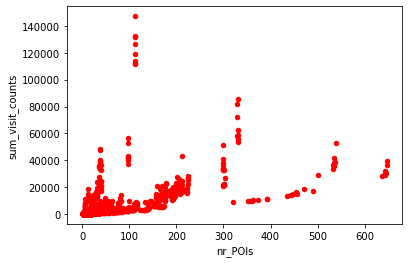

In [13]:
data.plot(kind='scatter', x='nr_POIs', y='sum_visit_counts', color='red')
plt.show()

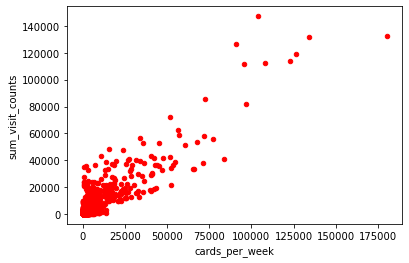

In [14]:
data.plot(kind='scatter', x='cards_per_week', y='sum_visit_counts', color='red')
plt.show()

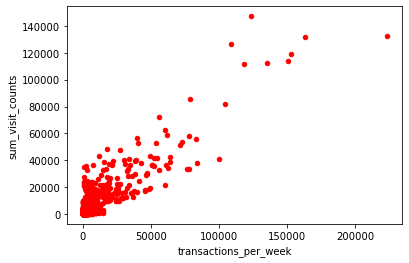

In [15]:
data.plot(kind='scatter', x='transactions_per_week', y='sum_visit_counts', color='red')
plt.show()

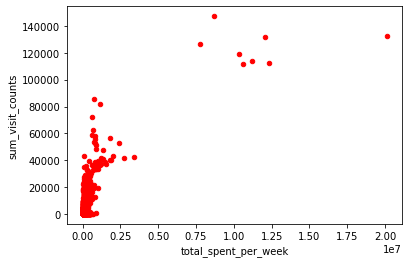

In [16]:
data.plot(kind='scatter', x='total_spent_per_week', y='sum_visit_counts', color='red')
plt.show()

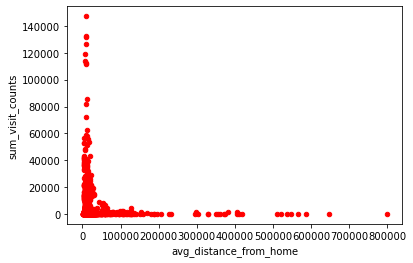

In [22]:
data.plot(kind='scatter', x='avg_distance_from_home', y='sum_visit_counts', color='red')
plt.show()

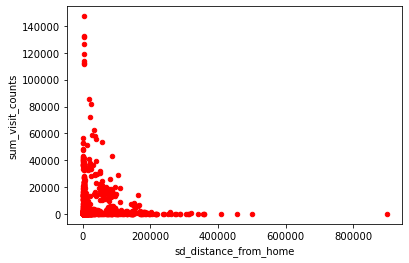

In [18]:
data.plot(kind='scatter', x='sd_distance_from_home', y='sum_visit_counts', color='red')
plt.show()

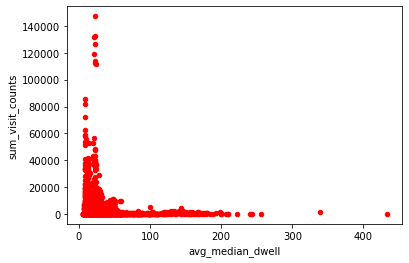

In [19]:
data.plot(kind='scatter', x='avg_median_dwell', y='sum_visit_counts', color='red')
plt.show()

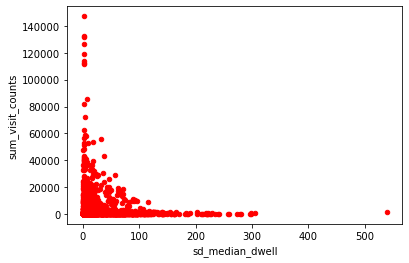

In [72]:
data.plot(kind='scatter', x='sd_median_dwell', y='sum_visit_counts', color='red')
plt.show()

Visualization shows the following relationships between the various data points against sum_visit_counts.

nr_pois: Unclear  
cards_per_week: Linear  
transactions_per_week = Linear  
total_spent_per_week = Polynomial  
avg_distance_from_home = Polynomial  
sd_distance_from_home = Polynomial  
avg_median_dwell = Polynomial  
sd_median_dwell = Polynomial  

Thus, I will first attempt a simple polynomial regression model before trying out more complicated approaches.

In [252]:
X = pandas.concat([nr_pois, cards_per_week, transactions_per_week, total_spent_per_week, avg_distance_from_home, sd_distance_from_home, avg_median_dwell, sd_median_dwell], axis=1)
y = sum_visit_counts

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

# I will also implement a linear regression model for comparison with the polynomial model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# The polynomial regression model
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_train_poly = poly_reg.fit_transform(X_train)
pol_reg = LinearRegression()
pol_reg.fit(X_train_poly, y_train)

# Calculate MSE of the linear and polynomial approaches on the test set. I should find the polynomial approach to be better.
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_test, lin_reg.predict(X_test))
poly_mse = mean_squared_error(y_test, pol_reg.predict(PolynomialFeatures(degree = 2).fit_transform(X_test)))
print('Linear Regression MSE: ', lin_mse)
print('Polynomial Regression MSE: ', poly_mse)


Linear Regression MSE:  16171776.299745338
Polynomial Regression MSE:  13574986.913383825


It seems that the polynomial regression model (with a degree of 2) is slightly better than the linear regression model, as predicted. I will introduce a small change to the polynomial model to see if it yields improvement: that of removing nr_pois from X since its relationship with y during our visualization was unclear.

In [253]:
X_revised = pandas.concat([cards_per_week, transactions_per_week, total_spent_per_week, avg_distance_from_home, sd_distance_from_home, avg_median_dwell, sd_median_dwell], axis=1)
X_revised_train, X_revised_test, y_train, y_test = train_test_split(X_revised, y, test_size = 0.2, random_state = 2)

X_revised_train_poly = poly_reg.fit_transform(X_revised_train)
pol_reg = LinearRegression()
pol_reg.fit(X_revised_train_poly, y_train)

poly_revised_mse = mean_squared_error(y_test, pol_reg.predict(PolynomialFeatures(degree = 2).fit_transform(X_revised_test)))
print('Polynomial Regression (Revised) MSE: ', poly_revised_mse)

Polynomial Regression (Revised) MSE:  8460794.498809543


This slight revision of the predictor X values did very little to improve the performance of the model. However, the slight improvement from the polynomial over the linear model has shown that more complexity in the model would do well to improve perfomance. MSE for the polynomial model remains high, I suspect, due to the relationships between data points not generalizing well to a solely quadratic or exponential relationship. I will attempt a neural network model approach to see if it achieves better results than the polynomial model. 

In [126]:
from sklearn.neural_network import MLPRegressor

# resplit just as a reminder
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)
y_train, y_test = y_train.values.ravel(), y_test.values.ravel()

# normalize input data (feature scaling)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (-1, 1)).fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

I will now begin testing with different neural network architectures to see which gives the best results. The two criterias I will use for this are the cross-validation scores and test scores.

In [127]:
# initialize neural network (hidden layer size: (100, ))
neural_network = MLPRegressor(hidden_layer_sizes = (100, ), activation = 'relu', solver = 'adam', max_iter = 200)

from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(neural_network, X_train, y_train, cv = 10)
test_score = neural_network.fit(X_train, y_train).score(X_test, y_test)
print('CV Accuracy Score: %0.3f' % np.mean(cv_score))
print('Test Accuracy Score: %0.3f' % test_score)

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


CV Accuracy Score: -0.037
Test Accuracy Score: -0.022


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [128]:
# initialize neural network (hidden layer size: (512, ))
neural_network = MLPRegressor(hidden_layer_sizes = (512, ), activation = 'relu', solver = 'adam', max_iter = 200)

from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(neural_network, X_train, y_train, cv = 10)
test_score = neural_network.fit(X_train, y_train).score(X_test, y_test)
print('CV Accuracy Score: %0.3f' % np.mean(cv_score))
print('Test Accuracy Score: %0.3f' % test_score)

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


CV Accuracy Score: 0.018
Test Accuracy Score: 0.039


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [129]:
# initialize neural network (hidden layer size: (512, 512, ))
neural_network = MLPRegressor(hidden_layer_sizes = (512, 512, ), activation = 'relu', solver = 'adam', max_iter = 200)

from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(neural_network, X_train, y_train, cv = 10)
test_score = neural_network.fit(X_train, y_train).score(X_test, y_test)
print('CV Accuracy Score: %0.3f' % np.mean(cv_score))
print('Test Accuracy Score: %0.3f' % test_score)

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


CV Accuracy Score: 0.766
Test Accuracy Score: 0.784


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Here, we can see that increasing the hidden layer numbers from 1 to 2 significantly increased quality. Despite the improvements, the neural network model is not converging. Right now, I do not know the reason why and will leave this problem for another time.

In [130]:
# initialize neural network (hidden layer size: (512, 512, 256))
neural_network = MLPRegressor(hidden_layer_sizes = (512, 512, 256, ), activation = 'relu', solver = 'adam', max_iter = 200)

from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(neural_network, X_train, y_train, cv = 10)
test_score = neural_network.fit(X_train, y_train).score(X_test, y_test)
print('CV Accuracy Score: %0.3f' % np.mean(cv_score))
print('Test Accuracy Score: %0.3f' % test_score)

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


CV Accuracy Score: 0.785
Test Accuracy Score: 0.802


In [131]:
# initialize neural network (hidden layer size: (100, 100, ))
neural_network = MLPRegressor(hidden_layer_sizes = (100, 100, ), activation = 'relu', solver = 'adam', max_iter = 200)

from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(neural_network, X_train, y_train, cv = 10)
test_score = neural_network.fit(X_train, y_train).score(X_test, y_test)
print('CV Accuracy Score: %0.3f' % np.mean(cv_score))
print('Test Accuracy Score: %0.3f' % test_score)

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


CV Accuracy Score: 0.669
Test Accuracy Score: 0.769


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [132]:
# initialize neural network (hidden layer size: (128, 128, 128, ))
neural_network = MLPRegressor(hidden_layer_sizes = (128, 128, 128, ), activation = 'relu', solver = 'adam', max_iter = 200)

from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(neural_network, X_train, y_train, cv = 10)
test_score = neural_network.fit(X_train, y_train).score(X_test, y_test)
print('CV Accuracy Score: %0.3f' % np.mean(cv_score))
print('Test Accuracy Score: %0.3f' % test_score)

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


CV Accuracy Score: 0.783
Test Accuracy Score: 0.803


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


It seems that rather than the number of neurons per layer, it is the number of layers that shows the most significant results.

In [133]:
# initialize neural network (hidden layer size: (128, 128, 128, 128, ))
neural_network = MLPRegressor(hidden_layer_sizes = (128, 128, 128, 128, ), activation = 'relu', solver = 'adam', max_iter = 200)

from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(neural_network, X_train, y_train, cv = 10)
test_score = neural_network.fit(X_train, y_train).score(X_test, y_test)
print('CV Accuracy Score: %0.3f' % np.mean(cv_score))
print('Test Accuracy Score: %0.3f' % test_score)

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


CV Accuracy Score: 0.774
Test Accuracy Score: 0.811


Above, I tried a neural network with 4 hidden layers to see whether there would be room for extra improvements. It seems to cap out at 3 layers however. I think a hidden layer size of (256, 256, 256, ) would provide the perfect balance between quality and training time. 

In [134]:
# initialize neural network (hidden layer size: (256, 256, 256, ))
neural_network = MLPRegressor(hidden_layer_sizes = (256, 256, 256, ), activation = 'relu', solver = 'adam', max_iter = 200)

from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(neural_network, X_train, y_train, cv = 10)
test_score = neural_network.fit(X_train, y_train).score(X_test, y_test)
print('CV Accuracy Score: %0.3f' % np.mean(cv_score))
print('Test Accuracy Score: %0.3f' % test_score)

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


CV Accuracy Score: 0.778
Test Accuracy Score: 0.807


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Below is a simple experiment to see whether increasing the maximum number of iterations would help. 

In [135]:
# initialize neural network (hidden layer size: (256, 256, 256, ), max_iter: 500)
neural_network = MLPRegressor(hidden_layer_sizes = (256, 256, 256, ), activation = 'relu', solver = 'adam', max_iter = 500)

from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(neural_network, X_train, y_train, cv = 10)
test_score = neural_network.fit(X_train, y_train).score(X_test, y_test)
print('CV Accuracy Score: %0.3f' % np.mean(cv_score))
print('Test Accuracy Score: %0.3f' % test_score)

CV Accuracy Score: 0.775
Test Accuracy Score: 0.807


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [136]:
# initialize neural network (hidden layer size: (256, 256, 256, 256, ), max_iter: 500)
neural_network = MLPRegressor(hidden_layer_sizes = (256, 256, 256, 256, ), activation = 'relu', solver = 'adam', max_iter = 500)

from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(neural_network, X_train, y_train, cv = 10)
test_score = neural_network.fit(X_train, y_train).score(X_test, y_test)
print('CV Accuracy Score: %0.3f' % np.mean(cv_score))
print('Test Accuracy Score: %0.3f' % test_score)

CV Accuracy Score: 0.775
Test Accuracy Score: 0.805


Increasing the max number of iterations also slightly improved performance, and it did seem to get rid of the error messages claiming the optimization has not converged yet. This can only be a good thing - so for the final model, I will keep max_iter at 500. I will now compare the MSE scores of the neural network approach to the previous linear and polynomial regression models.

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 231)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_mse = mean_squared_error(y_test, lin_reg.predict(X_test))

# The polynomial regression model
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_train_poly = poly_reg.fit_transform(X_train)
pol_reg = LinearRegression()
pol_reg.fit(X_train_poly, y_train)
poly_mse = mean_squared_error(y_test, pol_reg.predict(PolynomialFeatures(degree = 2).fit_transform(X_test)))

# normalize input data (feature scaling)
scaler = MinMaxScaler(feature_range = (-1, 1)).fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
y_train, y_test = y_train.values.ravel(), y_test.values.ravel()
# the neural network model
neural_network = MLPRegressor(hidden_layer_sizes = (256, 256, 256, ), activation = 'relu', solver = 'adam', max_iter = 500)
neural_network.fit(X_train, y_train)
nn_mse = mean_squared_error(y_test, neural_network.predict(X_test))

print('Linear Regression MSE: {:e}'.format(lin_mse))
print('Polynomial Regression MSE: {:e}'.format(poly_mse))
print('Neural Network MSE: {:e}'.format(nn_mse))



Linear Regression MSE: 2.038225e+07
Polynomial Regression MSE: 1.385593e+07
Neural Network MSE: 2.129308e+07


The neural network approach seems to be slightly worse than the polynomial regression model and equal in performance to the linear regression model. Better improvement, at this point, will probably come from careful curation of the data input points and carefully deciding which values to use rather than dedicating more power to training a model. For the first submission deadline, I will as such stick to using the polynomial regression model.

Now that I have decided on which model to use, it is time to start predicting the sum_visit_counts values for week 18.

My predictive model is dependent on knowing the 8 predictive data points. For week 18, I will simply use a brute force approach to calculate plausible values for those 8 predictive points by using the mean value of the previous 7 weeks. In future submissions, I will probably use a complicated model such as ARIMA to predict time series data.

In [161]:
# Copy is reused from previous cells to have entire logic in this space

# Gather the 8 relevant data points and the value to predict from weeks 10 to 17
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] ='bigquery_key.json'
bigquery_client = bigquery.Client(project='ironhacks-covid19-data')

QUERY = """

SELECT nr_POIs, cards_per_week, transactions_per_week, total_spent_per_week, avg_distance_from_home, sd_distance_from_home, avg_median_dwell, sd_median_dwell, sum_visit_counts
FROM ironhacks-covid19-data.ironhacks_covid19_competition.predictionset_covid19_phase1

"""

query_job = bigquery_client.query(QUERY)
data = query_job.to_dataframe()

,nr_POIs,cards_per_week,transactions_per_week,total_spent_per_week,avg_distance_from_home,sd_distance_from_home,avg_median_dwell,sd_median_dwell,sum_visit_counts
0,28,8649,10924,324452.92,5139,4801,10,10,1492
1,8,31,32,333.64,9018,2597,20,5,235
2,82,4992,5195,226672.35,7815,3814,19,3,14474
3,67,590,625,12805.75,6575,4299,16,11,3214
4,108,1109,1213,52326.62,7553,4536,20,20,4223


In [299]:
# Data points to predict from
nr_pois = pandas.DataFrame(data, columns = ['nr_POIs'])
cards_per_week = pandas.DataFrame(data, columns = ['cards_per_week'])
transactions_per_week = pandas.DataFrame(data, columns = ['transactions_per_week'])
total_spent_per_week = pandas.DataFrame(data, columns = ['total_spent_per_week'])
avg_distance_from_home = pandas.DataFrame(data, columns = ['avg_distance_from_home'])
sd_distance_from_home = pandas.DataFrame(data, columns = ['sd_distance_from_home'])
avg_median_dwell = pandas.DataFrame(data, columns = ['avg_median_dwell'])
sd_median_dwell = pandas.DataFrame(data, columns = ['sd_median_dwell'])

# Data point to predict
sum_visit_counts = pandas.DataFrame(data, columns = ['sum_visit_counts'])

X = pandas.concat([nr_pois, cards_per_week, transactions_per_week, total_spent_per_week, avg_distance_from_home, sd_distance_from_home, avg_median_dwell, sd_median_dwell], axis=1)
y = sum_visit_counts

In [306]:
# Begin training my polynomial regression model from the entirety of weeks 10 to 17
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X)
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [301]:
# Get the list of uuids to predict for week 18
QUERY = """

SELECT uuid
FROM ironhacks-covid19-data.ironhacks_covid19_competition.predictionset_covid19_phase1

"""
query_job = bigquery_client.query(QUERY)
uuids = query_job.to_dataframe()
entries = pandas.concat([uuids, X], axis=1)
entries = entries.values


In [329]:
# For each of the 304 uuids, begin calculating the mean of their predictor data points over weeks 10-17
unique_uuids = np.unique(uuids)
assert(len(unique_uuids == 304))

# submission to write to disk
submission = "UUID,week_number,sum_visit_counts\n"

list_of_predictors = []

for uuid in unique_uuids:
    # mean value of predictors for all 304 brands
    mean_nr_pois = []
    mean_cards_per_week = []
    mean_transactions_per_week = []
    mean_total_spent_per_week = []
    mean_avg_distance_from_home =[]
    mean_sd_distance_from_home = []
    mean_avg_median_dwell = []
    mean_sd_median_dwell = []
    
    for entry in entries:
        if uuid == entry[0]:
            mean_nr_pois.append(entry[1])
            mean_cards_per_week.append(entry[2])
            mean_transactions_per_week.append(entry[3])
            mean_total_spent_per_week.append(entry[4])
            mean_avg_distance_from_home.append(entry[5])
            mean_sd_distance_from_home.append(entry[6])
            mean_avg_median_dwell.append(entry[7])
            mean_sd_median_dwell.append(entry[8])
    
    mean_nr_pois = np.mean(mean_nr_pois)
    mean_cards_per_week = np.mean(mean_cards_per_week)
    mean_transactions_per_week = np.mean(mean_transactions_per_week)
    mean_total_spent_per_week = np.mean(mean_total_spent_per_week)
    mean_avg_distance_from_home = np.mean(mean_avg_distance_from_home)
    mean_sd_distance_from_home = np.mean(mean_sd_distance_from_home)
    mean_avg_median_dwell = np.mean(mean_avg_median_dwell)
    mean_sd_median_dwell = np.mean(mean_sd_median_dwell)
    
    predictors = [mean_nr_pois, mean_cards_per_week, mean_transactions_per_week, mean_total_spent_per_week, mean_avg_distance_from_home, mean_sd_distance_from_home, mean_avg_median_dwell, mean_sd_median_dwell]
    list_of_predictors.append(predictors)
        
list_of_predictors = PolynomialFeatures(degree=2).fit_transform(list_of_predictors)
sum_visit_counts_list = poly_reg.predict(list_of_predictors)
# adjust sum_visit_counts_list by rounding them to integers and setting their values to 0 if value is negative
sum_visit_counts_list = np.concatenate([value for value in sum_visit_counts_list])
sum_visit_counts_list = np.around(sum_visit_counts_list)
indexes = sum_visit_counts_list < 0
sum_visit_counts_list[indexes] = 0

# Begin writing the submission to csv format
for i in range(len(unique_uuids)):
    submission += "%s,%d,%d\n" % (unique_uuids[i], 18, sum_visit_counts_list[i])            

In [331]:
# Save the csv submission to disk
with open('submission_prediction_output.csv', 'w') as submit_csv_f:
    submit_csv_f.write(submission)